In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv', index_col = 0)
data

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [ ]:
data['datetime'] = pd.to_datetime(data[['year', 'month','day', 'hour']])
data = data.drop(['year', 'month','day', 'hour'], axis = 1)
data

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
No,,,,,,,,,
1,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
2,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
3,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
4,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
5,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
43820,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00
43821,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00
43822,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00


In [ ]:
data.isnull().sum()

pm2.5       2067
DEWP           0
TEMP           0
PRES           0
cbwd           0
Iws            0
Is             0
Ir             0
datetime       0
dtype: int64

In [ ]:
data = data[['datetime', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'pm2.5']].iloc[24:].reset_index().drop('No', axis = 1)
data[['pm2.5']] = data[['pm2.5']].interpolate(method='linear')

data

,datetime,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
0,2010-01-02 00:00:00,-16,-4.0,1020.0,SE,1.79,0,0,129.0
1,2010-01-02 01:00:00,-15,-4.0,1020.0,SE,2.68,0,0,148.0
2,2010-01-02 02:00:00,-11,-5.0,1021.0,SE,3.57,0,0,159.0
3,2010-01-02 03:00:00,-7,-5.0,1022.0,SE,5.36,1,0,181.0
4,2010-01-02 04:00:00,-7,-5.0,1022.0,SE,6.25,2,0,138.0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,-23,-2.0,1034.0,NW,231.97,0,0,8.0
43796,2014-12-31 20:00:00,-22,-3.0,1034.0,NW,237.78,0,0,10.0
43797,2014-12-31 21:00:00,-22,-3.0,1034.0,NW,242.70,0,0,10.0
43798,2014-12-31 22:00:00,-22,-4.0,1034.0,NW,246.72,0,0,8.0


In [ ]:
data = data.set_index('datetime')
data

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
datetime,,,,,,,,
2010-01-02 00:00:00,-16,-4.0,1020.0,SE,1.79,0,0,129.0
2010-01-02 01:00:00,-15,-4.0,1020.0,SE,2.68,0,0,148.0
2010-01-02 02:00:00,-11,-5.0,1021.0,SE,3.57,0,0,159.0
2010-01-02 03:00:00,-7,-5.0,1022.0,SE,5.36,1,0,181.0
2010-01-02 04:00:00,-7,-5.0,1022.0,SE,6.25,2,0,138.0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-23,-2.0,1034.0,NW,231.97,0,0,8.0
2014-12-31 20:00:00,-22,-3.0,1034.0,NW,237.78,0,0,10.0
2014-12-31 21:00:00,-22,-3.0,1034.0,NW,242.70,0,0,10.0


In [ ]:
data['cbwd'] = pd.factorize(data['cbwd'])[0]
#data = data.iloc[:2000,:]
data

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
datetime,,,,,,,,
2010-01-02 00:00:00,-16,-4.0,1020.0,0,1.79,0,0,129.0
2010-01-02 01:00:00,-15,-4.0,1020.0,0,2.68,0,0,148.0
2010-01-02 02:00:00,-11,-5.0,1021.0,0,3.57,0,0,159.0
2010-01-02 03:00:00,-7,-5.0,1022.0,0,5.36,1,0,181.0
2010-01-02 04:00:00,-7,-5.0,1022.0,0,6.25,2,0,138.0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-23,-2.0,1034.0,2,231.97,0,0,8.0
2014-12-31 20:00:00,-22,-3.0,1034.0,2,237.78,0,0,10.0
2014-12-31 21:00:00,-22,-3.0,1034.0,2,242.70,0,0,10.0


In [ ]:
X = data.iloc[:,:-1].values.astype(float) # Features
y = data.iloc[:,-1].values.astype(float) # Target: pm2.5

In [ ]:
y= y.reshape(-1, 1)

In [ ]:
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [ ]:
#regressor = SVR(kernel='rbf', degree=3, gamma='auto', tol=0.001, C=10000)
regressor.fit(X,y)

y_pred = regressor.predict(X)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
data['actual_pm'] = y
data['pred_pm'] = y_pred
data

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5,actual_pm,pred_pm
datetime,,,,,,,,,,
2010-01-02 00:00:00,-16,-4.0,1020.0,0,1.79,0,0,129.0,0.338094,0.489030
2010-01-02 01:00:00,-15,-4.0,1020.0,0,2.68,0,0,148.0,0.546963,0.597861
2010-01-02 02:00:00,-11,-5.0,1021.0,0,3.57,0,0,159.0,0.667888,0.496624
2010-01-02 03:00:00,-7,-5.0,1022.0,0,5.36,1,0,181.0,0.909736,1.243927
2010-01-02 04:00:00,-7,-5.0,1022.0,0,6.25,2,0,138.0,0.437032,0.871041
...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-23,-2.0,1034.0,2,231.97,0,0,8.0,-0.992074,-0.972726
2014-12-31 20:00:00,-22,-3.0,1034.0,2,237.78,0,0,10.0,-0.970088,-0.959240
2014-12-31 21:00:00,-22,-3.0,1034.0,2,242.70,0,0,10.0,-0.970088,-0.964701


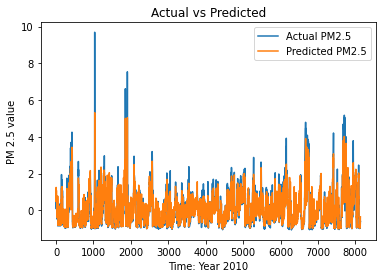

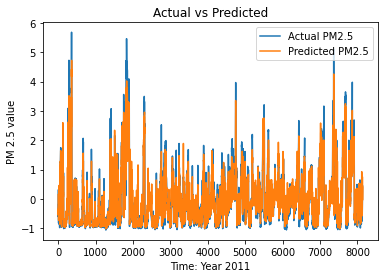

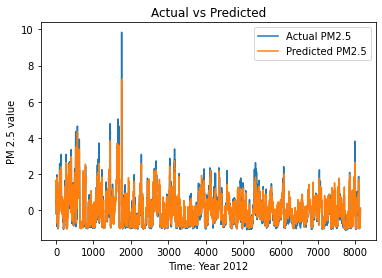

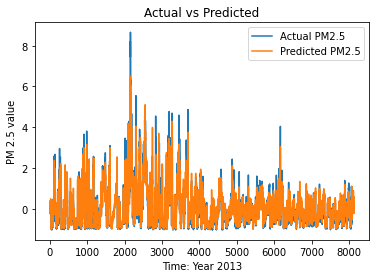

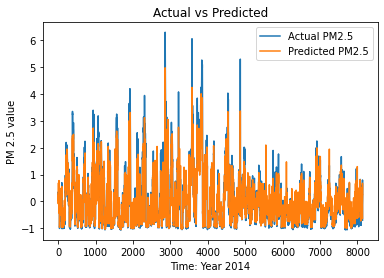

In [ ]:
year = ['2010','2011','2012','2013','2014']
for i in range(5):
  plt.plot(y[i*8136:(i+1)*8136], label='Actual PM2.5')
  plt.plot(y_pred[i*8136:(i+1)*8136],label='Predicted PM2.5')
  plt.xlabel('Time: Year '+year[i])
  plt.ylabel('PM 2.5 value')
  plt.title('Actual vs Predicted')
  plt.legend(loc="upper right")
  plt.show()

In [ ]:
print('MSE ',round(mean_squared_error(y,y_pred),2))
print('RMSE ',round(sqrt(mean_squared_error(y,y_pred)),2))
print('R ',round((r2_score(y,y_pred)**2),2))
print('R-square ',round(r2_score(y,y_pred),2))

MSE  0.1
RMSE  0.32
R  0.81
R-square  0.9
